# Explore here

In [22]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


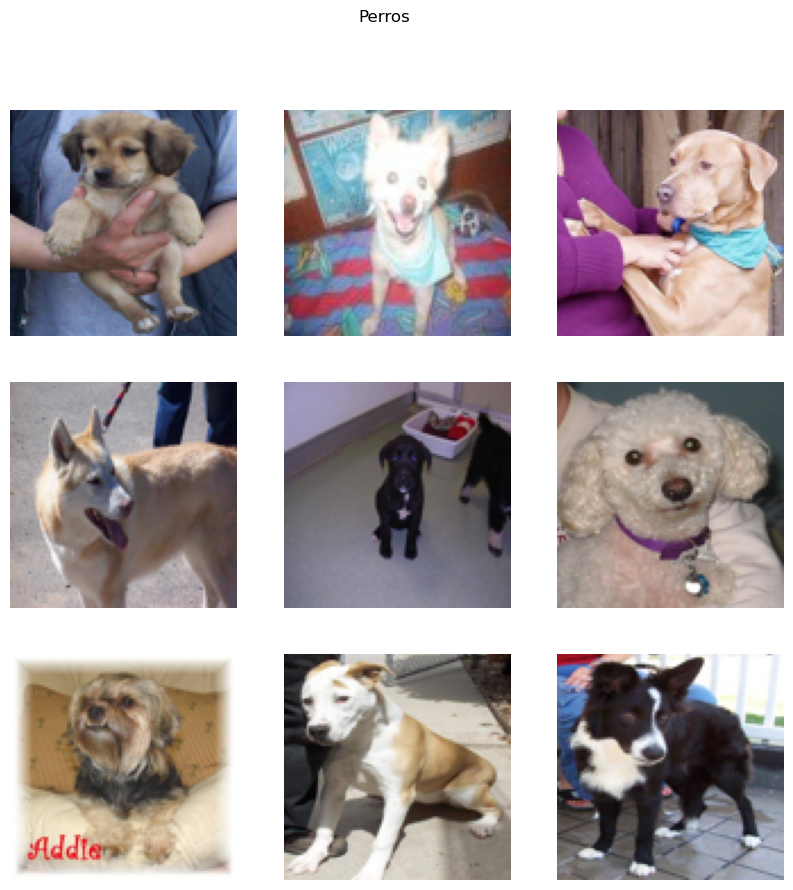

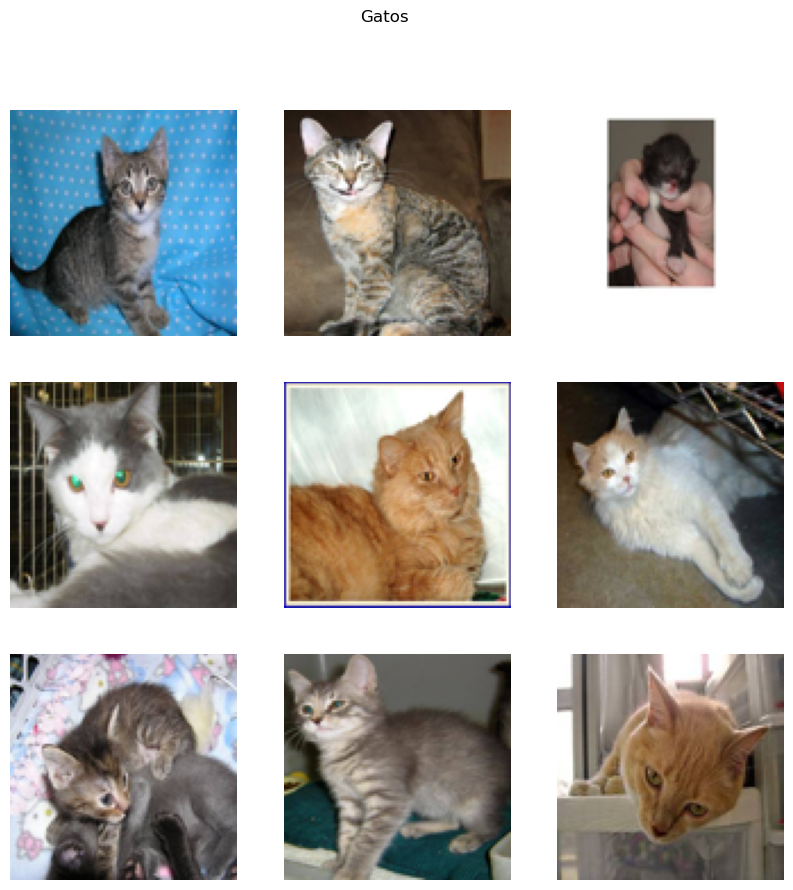

In [23]:

# Definir las rutas
data_dir = '/Users/luiseduardogarciablanco/Desktop/bootcamp/dogs-vs-cats/train'
test_dir = '/Users/luiseduardogarciablanco/Desktop/bootcamp/dogs-vs-cats/test1'

dog_images = [os.path.join(data_dir, fname) for fname in os.listdir(data_dir) if fname.startswith('dog')]
cat_images = [os.path.join(data_dir, fname) for fname in os.listdir(data_dir) if fname.startswith('cat')]

# Función para cargar, convertir a escala de grises y redimensionar las imágenes
def load_and_resize_image(image_path, size=(100, 100)):
    with Image.open(image_path) as img:
        #img = img.convert('L')  # Convertir a escala de grises
        img = img.resize(size)
        return np.array(img)

# Función para mostrar imágenes
def display_images(images, title, cmap='gray'):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap=cmap)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Cargar y redimensionar las primeras 9 imágenes de perros y gatos
first_9_dogs = [load_and_resize_image(dog_images[i]) for i in range(9)]
first_9_cats = [load_and_resize_image(cat_images[i]) for i in range(9)]

# Mostrar las imágenes
display_images(first_9_dogs, "Perros")
display_images(first_9_cats, "Gatos")


Esta variedad de tamaños y formatos debe solucionarse antes de entrenar el modelo. Asegúrate de que todas tengan un tamaño fijo de 200x200 píxeles.

In [24]:
# Función para procesar todas las imágenes
def preprocess_images(image_paths, label, size=(100, 100)):
    images = []
    labels = []
    for image_path in image_paths:
        img = load_and_resize_image(image_path, size)
        images.append(img)
        labels.append(label)
    return images, labels

# Procesar las imágenes de perros y gatos
dog_images_processed, dog_labels = preprocess_images(dog_images, 0)  # 0 para perros
cat_images_processed, cat_labels = preprocess_images(cat_images, 1)  # 1 para gatos

# Combinar los datos y etiquetas
all_images = np.array(dog_images_processed + cat_images_processed)
all_labels = np.array(dog_labels + cat_labels)

# Mezclar los datos
indices = np.arange(len(all_images))
np.random.shuffle(indices)
all_images = all_images[indices]
all_labels = all_labels[indices]

creamos imagenes "rotas" para mejorar el entrenamiento, quiero decir, con algo de zoom, movidas, incompletas, rotadas algunos grados, a partir de las imagenes del train, con esto tendriamos mas donde aprender y mejorar los resultados

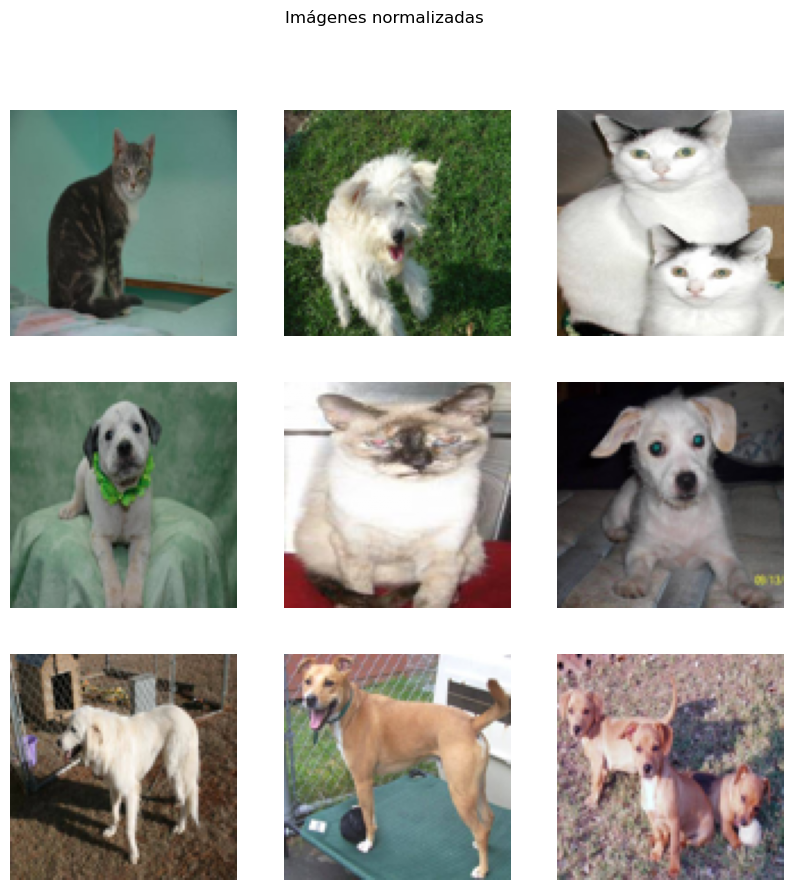

In [25]:
# Dividir los datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)
'''
# Añadir una dimensión para el canal de color (1 canal para escala de grises)
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
'''
# Normalizar los píxeles de las imágenes
X_train = X_train / 255.0
X_val = X_val / 255.0

# Mostrar algunas imágenes normalizadas
display_images(X_train[:9].squeeze(), "Imágenes normalizadas", cmap='gray')


In [26]:
# Configurar el aumento de datos para mejorar el aprendizaje distorcionando las fotos
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [19]:
#este es el modelo que pide el ejercicio pero es muy poco eficiente y no mejora los resultados, dando un accuracy de solo 0,5897 en su mejor caso.
"""
# Definir el modelo
model = Sequential()
model.add(Conv2D(input_shape=(100, 100, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=2, activation="softmax"))

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()
"""

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 100, 100, 64)      1792      
                                                                 
 conv2d_17 (Conv2D)          (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 50, 50, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 50, 50, 128)       73856     
                                                                 
 conv2d_19 (Conv2D)          (None, 50, 50, 128)       147584    
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 25, 25, 128)       0         
 g2D)                                                 

In [27]:

# Ajustar el generador de datos al conjunto de entrenamiento
datagen.fit(X_train)

'''# Definir el modelo simplificado para imágenes en blanco y negro
model = Sequential()
model.add(Conv2D(input_shape=(100, 100, 1), filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation="softmax"))'''

# Definir el modelo simplificado para imágenes en color
model = Sequential()
model.add(Conv2D(input_shape=(100, 100, 3), filters=32, kernel_size=(3, 3), padding="same", activation="relu")) # el tercer canal del input con valor 3 determina el cnal RGB (color)
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation="softmax"))

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 50, 50, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 50, 50, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 25, 25, 64)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 25, 25, 64)       

In [28]:
# Crear los callbacks para guardar el mejor modelo y detener el entrenamiento temprano
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

# Entrenar el modelo utilizando el generador de datos con los callbacks
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                    epochs=50, 
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint, early_stopping])

# Cargar el mejor modelo guardado
best_model = load_model('best_model.h5')

Epoch 1/50


2024-07-27 10:11:22.145594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


624/625 [============================>.] - ETA: 0s - loss: 0.8552 - accuracy: 0.4963

2024-07-27 10:11:50.710945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.49740, saving model to best_model.h5


/Users/luiseduardogarciablanco/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 31s 49ms/step - loss: 0.8550 - accuracy: 0.4963 - val_loss: 0.6932 - val_accuracy: 0.4974
Epoch 2/50
625/625 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.5027
Epoch 2: val_accuracy improved from 0.49740 to 0.53480, saving model to best_model.h5
625/625 [==============================] - 26s 42ms/step - loss: 0.6929 - accuracy: 0.5027 - val_loss: 0.6868 - val_accuracy: 0.5348
Epoch 3/50
624/625 [============================>.] - ETA: 0s - loss: 0.6851 - accuracy: 0.5539
Epoch 3: val_accuracy improved from 0.53480 to 0.56820, saving model to best_model.h5
625/625 [==============================] - 26s 41ms/step - loss: 0.6851 - accuracy: 0.5541 - val_loss: 0.6698 - val_accuracy: 0.5682
Epoch 4/50
625/625 [==============================] - ETA: 0s - loss: 0.7259 - accuracy: 0.5485
Epoch 4: val_accuracy improved from 0.56820 to 0.62380, saving model to best_model.h5
625/625 [==============================] - 26s 41ms/ste

In [29]:
# Evaluar el mejor modelo
val_loss, val_accuracy = best_model.evaluate(X_val, y_val)
print(f'Pérdida de validación: {val_loss}')
print(f'Precisión de validación: {val_accuracy}')

  5/157 [..............................] - ETA: 2s - loss: 0.6082 - accuracy: 0.6938 

2024-07-27 10:15:58.367236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 3s 16ms/step - loss: 0.6276 - accuracy: 0.6658
Pérdida de validación: 0.627631425857544
Precisión de validación: 0.6657999753952026


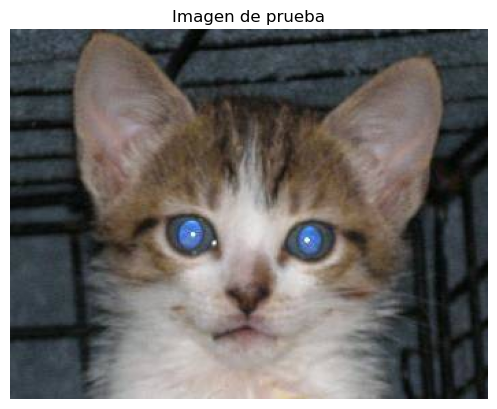

1/1 [==============================] - 0s 14ms/step
Predicción: Es un Gato


In [33]:

# Función para cargar y preprocesar una imagen de prueba en blanco y negro
def preprocess_test_image(image_path, size=(100, 100)):
    with Image.open(image_path) as img:
        #img = img.convert('L')  # Convertir a escala de grises
        img = img.resize(size)
        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=-1)  # Añadir dimensión para el canal de color
        img_array = np.expand_dims(img_array, axis=0)  # Añadir dimensión para el batch
        return img_array

# Seleccionar una imagen de prueba al azar
test_images = [os.path.join(test_dir, fname) for fname in os.listdir(test_dir) if fname.endswith('.jpg')]
test_image_path = test_images[9622]  # Puedes cambiar el índice para seleccionar una imagen diferente

# Preprocesar la imagen de prueba
test_image = preprocess_test_image(test_image_path)

'''
# Mostrar la imagen de prueba en blanco y negro
plt.imshow(Image.open(test_image_path).convert('L'), cmap='gray')
plt.title("Imagen de prueba en blanco y negro")
plt.axis('off')
plt.show()
'''

# Mostrar la imagen de prueba en color
plt.imshow(Image.open(test_image_path))
plt.title("Imagen de prueba")
plt.axis('off')
plt.show()

# Predecir la clase de la imagen de prueba
prediction = best_model.predict(test_image)
predicted_class = 'Es un Perro' if np.argmax(prediction[0]) == 0 else 'Es un Gato'

print(f'Predicción: {predicted_class}')

2024-07-27 10:43:40.054893: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-07-27 10:43:40.054917: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-07-27 10:43:40.054921: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-07-27 10:43:40.055163: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-27 10:43:40.055179: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


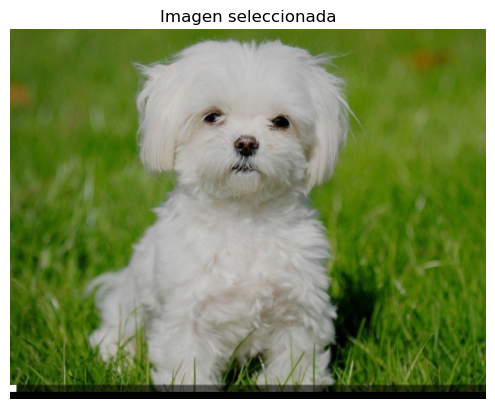

1/1 [==============================] - 0s 101ms/step
Predicción: Perro


2024-07-27 10:43:52.734643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [1]:
# generamos esta instancia para subir una foto "propia" desd el ordenador para validar el modelo de prediccion con una foto fuera del conjunto "test"
from PIL import Image
from tkinter import Tk, filedialog

# Función para cargar y preprocesar una imagen
def preprocess_image(image_path, size=(100, 100)):
    with Image.open(image_path) as img:
        img = img.resize(size)
        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)  # Añadir dimensión para el batch
        return img_array

# Función para seleccionar una imagen desde el ordenador (abre una ventana del explorador de archivos donde debes seleccionar una imagen)
def select_image():
    root = Tk()
    root.withdraw()  # Cerrar la ventana principal de Tkinter
    file_path = filedialog.askopenfilename()
    return file_path

# Función para predecir la clase de una imagen
def predict_image(model, image_path):
    image = preprocess_image(image_path)
    prediction = model.predict(image)
    predicted_class = 'Perro' if np.argmax(prediction[0]) == 0 else 'Gato'
    return predicted_class

# Cargar el modelo guardado
best_model = load_model('/Users/luiseduardogarciablanco/Desktop/bootcamp/ML_Image_Classifier/src/best_model.h5')

# Seleccionar una imagen desde el ordenador
image_path = select_image()

# Mostrar la imagen seleccionada
plt.imshow(Image.open(image_path))
plt.title("Imagen seleccionada")
plt.axis('off')
plt.show()

# Realizar la predicción
predicted_class = predict_image(best_model, image_path)
print(f'Predicción: {predicted_class}')